<a href="https://colab.research.google.com/github/tarun9804/NN_tutorial/blob/main/Notebooks/tutorial/NN/NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Neural networ classification

A classification is where you try to classify as one thing from another

A few types of classification problems:
* Binary
* Multiclass
* Multilabel

In [1]:
#### Creating data to view and fit

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.utils import plot_model

In [5]:
from sklearn.datasets import make_circles

In [6]:
n_sample=1000
x,y=make_circles(n_sample,
                 noise=0.03,
                 random_state=20)

In [7]:
x.shape

(1000, 2)

In [8]:
y.shape

(1000,)

### Visualize
* Data
* Model
* Training
* Predictions

In [9]:
circle=pd.DataFrame({'x0':x[:,0],'x1':x[:,1],'label':y})

In [10]:
circle.head()

,x0,x1,label
0,0.157615,-0.762987,1
1,-0.602078,0.541105,1
2,-0.651064,-0.459851,1
3,-0.290669,0.957301,0
4,-0.151961,-0.811346,1


### cmap

plt.cm.(press ctrl+space for all the options)

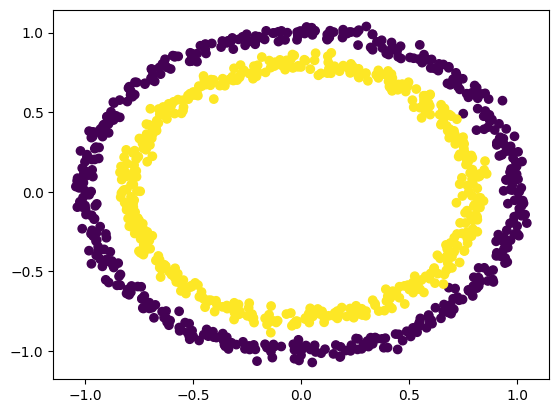

In [11]:
plt.scatter(circle.x0,circle.x1,c=y,cmap='viridis')

### input and output shape
* check the shapes before creating model

In [12]:
x.shape,y.shape

((1000, 2), (1000,))

In [13]:
len(x),len(y)

(1000, 1000)

## Steps in modelling
![steps](https://github.com/tarun9804/misc/blob/main/Images/DeepLearning/model_DL3.JPG?raw=true)

In [14]:
# set the random seed
tf.random.set_seed(23)

# 1. Creating the model using Seuqential API
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=tf.keras.metrics.Accuracy())

model_1.fit(x,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 6.2321 - accuracy: 0.0000e+00
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.4585 - accuracy: 0.0000e+00
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 5.7858 - accuracy: 0.0000e+00
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 5.5384 - accuracy: 0.0000e+00
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 5.1077 - accuracy: 0.0000e+00


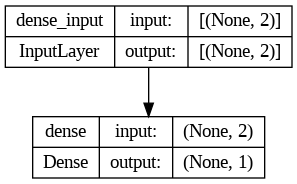

In [15]:
plot_model(model_1,show_shapes=True)

In [16]:
# tweaking epochs
model_1.fit(x,y,epochs=200,verbose=0)
model_1.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.0000e+00


[0.6932087540626526, 0.0]

In [17]:
# set the random seed
tf.random.set_seed(24)

# 1. Creating the model using Seuqential API
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=tf.keras.metrics.Accuracy())

In [18]:
model_2.fit(x,y,epochs=200,verbose=0)
model_2.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.0000e+00


[0.6932328343391418, 0.0]

In [19]:
circle.label.value_counts()

1    500
0    500
Name: label, dtype: int64

### Improving the model
1. creating a model
  - Add more layers
  - change number of hidden units
  - change activation function
2. Compiling the model
  - choose different opimization function
  - change learning rate
3. Fitting a model
  - increase number of epochs
  - fitting on more data

In [20]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=tf.keras.metrics.categorical_accuracy
)

model_3.fit(x,y,epochs=100,verbose=0)
model_3.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0047 - categorical_accuracy: 1.0000


[0.004689272027462721, 1.0]

In [21]:
def plot_decision_boundary(model,x,y):
  """
plots the boundary
  """
  x_min,x_max=x[:,0].min()-0.1,x[:,0].max()+0.1
  y_min,y_max=x[:,1].min()-0.1,x[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))
  x_in=np.c_[xx.ravel(),yy.ravel()]
  y_pred=model.predict(x_in)
  y_pred=np.round(y_pred).reshape(xx.shape)
  plt.contourf(xx,yy,y_pred,cmap='viridis',alpha=0.7)
  plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 0s 1ms/step


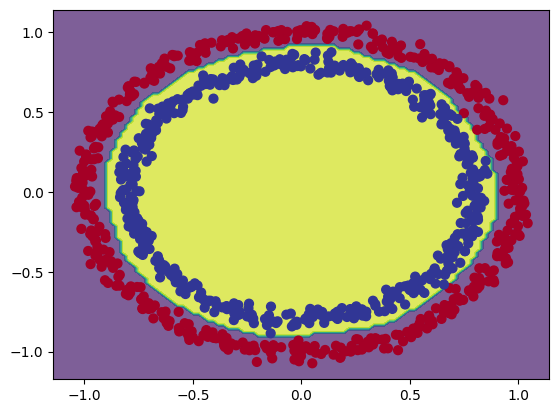

In [22]:
plot_decision_boundary(model_3,x=x,y=y)

```
Source for plot   
search for    
  cs231 in neural networks case study
  https://madewithml.com/courses/foundations/neural-networks/
  
```

![image](https://github.com/tarun9804/NN_tutorial/blob/main/image_files/Classification_NN/classification_NN4.JPG?raw=true)